<a href="https://colab.research.google.com/github/erni26/pemograman_python/blob/main/tugaspython14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tugas Python Erni Yanthy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

perintah

In [2]:
#nilai pathloss
def cos(frek,macam,ht,tu,d):
  #frek = frekuensi (MHz)
  #macam = urban, suburban, open
  #ht = tinggi tower (meter)
  #tu = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if macam=='urban' :
        Cm=0
    elif macam=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif macam=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='macam salah'
    
    atu = (1.1*np.log10(frek)-0.7)*tu-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-atu+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

#nilai daya terima
def daya_terima(ptx,Lp, gtx, grx):
  prx = 10*np.log10(ptx) - Lp + gtx + grx
  
  return 10**(prx/10)

#nili signal to noise ratio
def s2nr (bw, prx):
  no = -174 + 10*np.log10(bw)
  no1 = 10**(no/10)
  
  return prx/no1

#kapasitas seluler
def kapasitas_seluler (bw, snr):
  ks= bw * np.log2(1+snr)

  return ks

Data

In [3]:

ht = 80 #meter
tu = 1.5 #meter
macam = ['urban', 'suburban', 'open']
frek = [ 700, 900, 1800]
jarakmax = 1000 #meter
jarakmin = 300 #meter
titik = 200 #user
d = np.random.randint(jarakmin, jarakmax, titik)
d = d[np.argsort(d)]
ptx = 30 #watt
gtx = 10 #dB
grx = 2 #dB
bw = 5000000 #Hz

Penghitungan Frekuensi 1800MHz di 3 macam Area

In [4]:
lp1 = []
prx1 = []
snr1 = []
ks1 = []
for i in range(3):
  lp1.append(cos(frek[2], macam[i], ht, tu, d))

  prx1.append(daya_terima(ptx, lp1[i], gtx, grx))
  prx_sort = prx1[i]
  prx1[i] = prx_sort[np.argsort(d)]

  snr1.append(s2nr(bw, prx1[i]))
  snr_sort = snr1[i]
  snr1[i]= snr_sort[np.argsort(d)]

  ks1.append(kapasitas_seluler(bw, snr1[i]))
  ks_sort = ks1[i]
  ks1[i]= ks_sort[np.argsort(d)]


Penghitungan  macam area Urban Dengan Frekuensi 700MHz, 900MHz, 1800MHz

In [5]:
lp2 = []
prx2 = []
snr2 = []
ks2 = []
for i in range(3):
  lp2.append(cos(frek[i], macam[0], ht, tu, d))

  prx2.append(daya_terima(ptx, lp2[i], gtx, grx))
  prx_sort1 = prx2[i]
  prx2[i] = prx_sort1[np.argsort(d)]

  snr2.append(s2nr(bw, prx2[i]))
  snr_sort1 = snr2[i]
  snr2[i]= snr_sort1[np.argsort(d)]

  ks2.append(kapasitas_seluler(bw, snr2[i]))
  ks_sort1 = ks2[i]
  ks2[i]= ks_sort1[np.argsort(d)]

Grafik

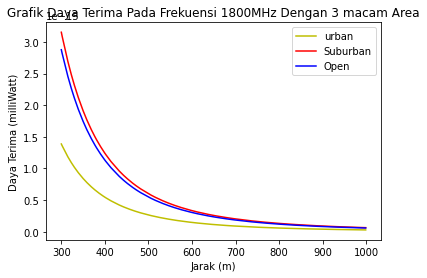

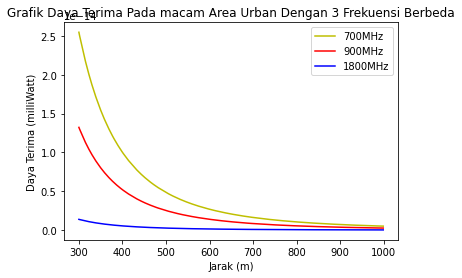

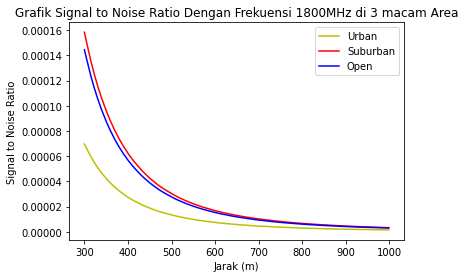

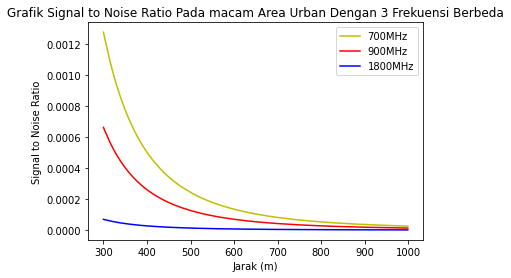

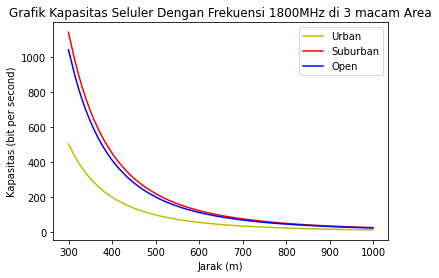

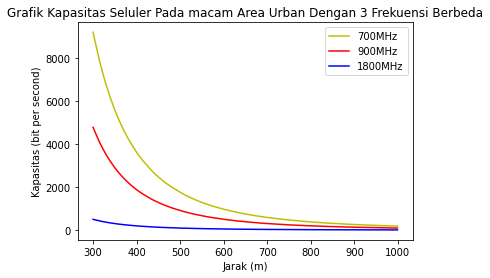

In [6]:
#grafik daya terima pada frekuensi 1800MHz dengan 3 macam area
plt.plot(d, prx1[0], 'y')
plt.plot(d, prx1[1], 'r')
plt.plot(d, prx1[2], 'b')
plt.title('Grafik Daya Terima Pada Frekuensi 1800MHz Dengan 3 macam Area')
plt.ylabel('Daya Terima (milliWatt)')
plt.xlabel('Jarak (m)')
plt.legend(['urban', 'Suburban', 'Open'], loc='upper right')
plt.show()

#grafik daya terima pada macam area urban dengan frekuensi 700MHz, 900Mhz, dan 1800MHz
plt.plot(d, prx2[0], 'y')
plt.plot(d, prx2[1], 'r')
plt.plot(d, prx2[2], 'b')
plt.title('Grafik Daya Terima Pada macam Area Urban Dengan 3 Frekuensi Berbeda')
plt.ylabel('Daya Terima (milliWatt)')
plt.xlabel('Jarak (m)')
plt.legend(['700MHz', '900MHz', '1800MHz'], loc='upper right')
plt.show()

#grafik signal to noise ratio pada frekuensi 1800MHz dengan 3 macam area
plt.plot(d, snr1[0], 'y')
plt.plot(d, snr1[1], 'r')
plt.plot(d, snr1[2], 'b')
plt.title('Grafik Signal to Noise Ratio Dengan Frekuensi 1800MHz di 3 macam Area')
plt.ylabel('Signal to Noise Ratio')
plt.xlabel('Jarak (m)')
plt.legend(['Urban', 'Suburban', 'Open'], loc='upper right')
plt.show()

#grafik signal to ratio di macam are urban dengan 3 frekuensi yang berbeda
plt.plot(d, snr2[0], 'y')
plt.plot(d, snr2[1], 'r')
plt.plot(d, snr2[2], 'b')
plt.title('Grafik Signal to Noise Ratio Pada macam Area Urban Dengan 3 Frekuensi Berbeda')
plt.ylabel('Signal to Noise Ratio')
plt.xlabel('Jarak (m)')
plt.legend(['700MHz', '900MHz', '1800MHz'], loc='upper right')
plt.show()

#grafik kapasitas seluler dengan frekuensi 1800MHz di 3 macam area
plt.plot(d, ks1[0], 'y')
plt.plot(d, ks1[1], 'r')
plt.plot(d, ks1[2], 'b')
plt.title('Grafik Kapasitas Seluler Dengan Frekuensi 1800MHz di 3 macam Area')
plt.ylabel('Kapasitas (bit per second)')
plt.xlabel('Jarak (m)')
plt.legend(['Urban', 'Suburban', 'Open'], loc='upper right')
plt.show()

#grafik kapasistas seluler di macam area urban dengan 3 frekuensi yang berbeda
plt.plot(d, ks2[0], 'y')
plt.plot(d, ks2[1], 'r')
plt.plot(d, ks2[2], 'b')
plt.title('Grafik Kapasitas Seluler Pada macam Area Urban Dengan 3 Frekuensi Berbeda')
plt.ylabel('Kapasitas (bit per second)')
plt.xlabel('Jarak (m)')
plt.legend(['700MHz', '900MHz', '1800MHz'], loc='upper right')
plt.show()
